In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [3]:
import warnings

In [4]:
warnings.filterwarnings("ignore")

### Generation of Technical Indicators

In [5]:
import ta

In [6]:
pa = pd.read_csv("zhongguo_pingan.csv")

In [7]:
data = pa.sort_values(by='trade_date').reset_index(drop=True)

In [8]:
data['ATR'] = ta.volatility.AverageTrueRange(high=data['high'], low=data['low'], close=data['close'], window=14).average_true_range()

data['OBV'] = ta.volume.OnBalanceVolumeIndicator(close=data['close'], volume=data['vol']).on_balance_volume()


data['ADX'] = ta.trend.ADXIndicator(high=data['high'], low=data['low'], close=data['close'], window=14).adx()

data['AROON_DOWN'] = ta.trend.AroonIndicator(high=data['high'], low=data['low'], window=14).aroon_down()
data['AROON_UP'] = ta.trend.AroonIndicator(high=data['high'], low=data['low'], window=14).aroon_up()

data['CCI'] = ta.trend.CCIIndicator(high=data['high'], low=data['low'], close=data['close'], window=14).cci()

data['ROC'] = ta.momentum.ROCIndicator(close=data['close'], window=10).roc()

data['5MA'] = ta.trend.SMAIndicator(close=data['close'], window=5).sma_indicator()

data['10MA'] = ta.trend.SMAIndicator(close=data['close'], window=10).sma_indicator()

data['20MA'] = ta.trend.SMAIndicator(close=data['close'], window=20).sma_indicator()

macd = ta.trend.MACD(close=data['close'], window_slow=26, window_fast=12, window_sign=9)
data['MACD'] = macd.macd()
data['MACD_signal'] = macd.macd_signal()
data['MACD_hist'] = macd.macd_diff()

data['EMA12'] = ta.trend.EMAIndicator(close=data['close'], window=12).ema_indicator()

data['EMA26'] = ta.trend.EMAIndicator(close=data['close'], window=26).ema_indicator()


In [9]:
data.to_csv("zhongguo_pingan_with_indicators.csv", index=False)
print("data saved to zhongguo_pingan_with_indicators.csv")

data saved to zhongguo_pingan_with_indicators.csv


In [10]:
data1=pd.read_csv("zhongguo_pingan_with_indicators.csv")
data1=data1.dropna()

# 1. Dataset Introduction

data source: tushare;  <br> selected stock: zhongguo pingan(601318.SH); <br>selected time: 20200501-20241108 <br> 

#### primary index:
<br>--open: Opening Price
<br>--high: Highest Price
<br>--low: Lowest Price
<br>--close: Closing Price
<br>--vol: Volume
<br>--amount: Amount (or Turnover)
<br>--pct_change: Percentage Change
<br>--amplitude: Amplitude (Price Range)
<br>--turnover_rate: Turnover Rate
<br>--pe_ttm: Price-to-Earnings Ratio (Trailing Twelve Months)
<br>--pb: Price-to-Book Ratio
<br>--ps_ttm: Price-to-Sales Ratio (Trailing Twelve Months)
<br>--dv_ratio: Dividend Yield Ratio
<br>--total_mv: Total Market Value
<br>--peg_ratio: Price/Earnings-to-Growth Ratio

To make the data more comprehensive, this paper also generated technical indicators using the third-party package Talib through technical analysis indicator calculations.

#### technical indicator:
<br>--ATR: Average True Range
<br>--OBV: On-Balance Volume
<br>--ADX: Average Directional Index
<br>--AROON_DOWN: Aroon Down
<br>--AROON_UP: Aroon Up
<br>--CCI: Commodity Channel Index
<br>--ROC: Rate of Change
<br>--5MA: 5-Day Moving Average
<br>--10MA: 10-Day Moving Average
<br>--20MA: 20-Day Moving Average
<br>--MACD: Moving Average Convergence Divergence
<br>--MACD_signal: MACD Signal Line
<br>--MACD_hist: MACD Histogram
<br>--EMA12: 12-Day Exponential Moving Average
<br>--EMA26: 26-Day Exponential Moving Average

# 2. Data Visualizations

## 2.1 Visualization of raw stock price data

### ① Line Chart of Stock Price Trend

Display the trends of the opening price, closing price, highest price, and lowest price to help understand the overall trend of the stock price.

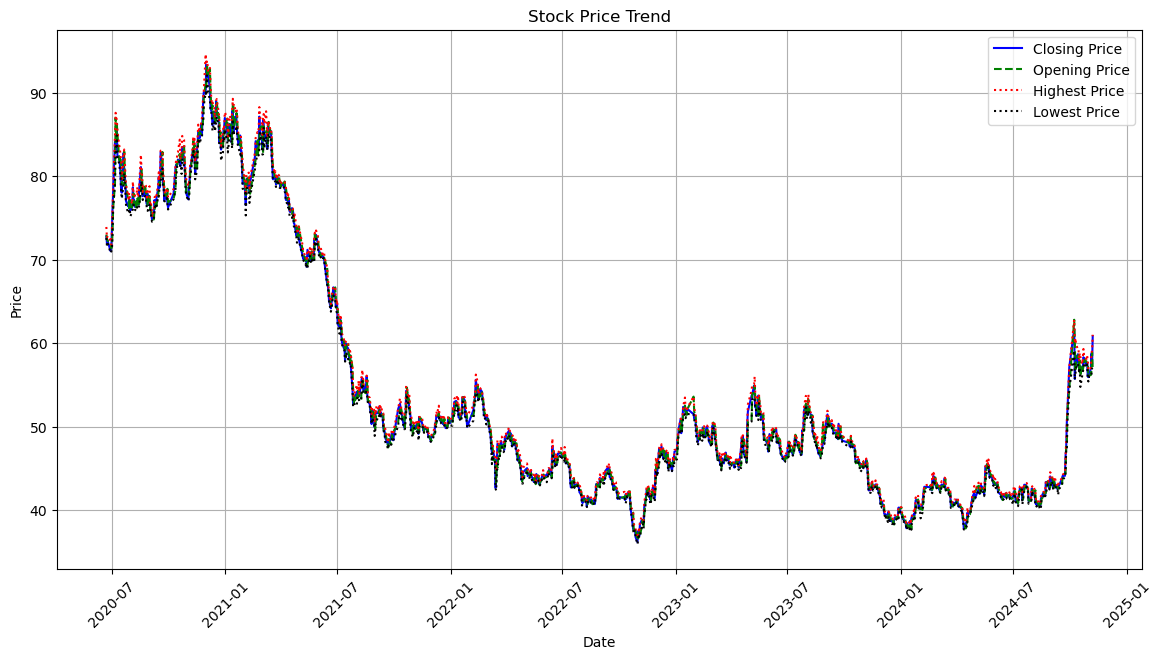

In [11]:
data1['trade_date'] = pd.to_datetime(data1['trade_date'], format='%Y%m%d')
plt.figure(figsize=(14, 7))
plt.plot(data1['trade_date'], data1['close'], label='Closing Price', color='blue')
plt.plot(data1['trade_date'], data1['open'], label='Opening Price', color='green', linestyle='--')
plt.plot(data1['trade_date'], data1['high'], label='Highest Price', color='red', linestyle=':')
plt.plot(data1['trade_date'], data1['low'], label='Lowest Price', color='black', linestyle=':')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price Trend')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### ② Volume Bar Chart

A bar chart showing daily volume, combined with price action, to observe changes in market capital flows and activity.

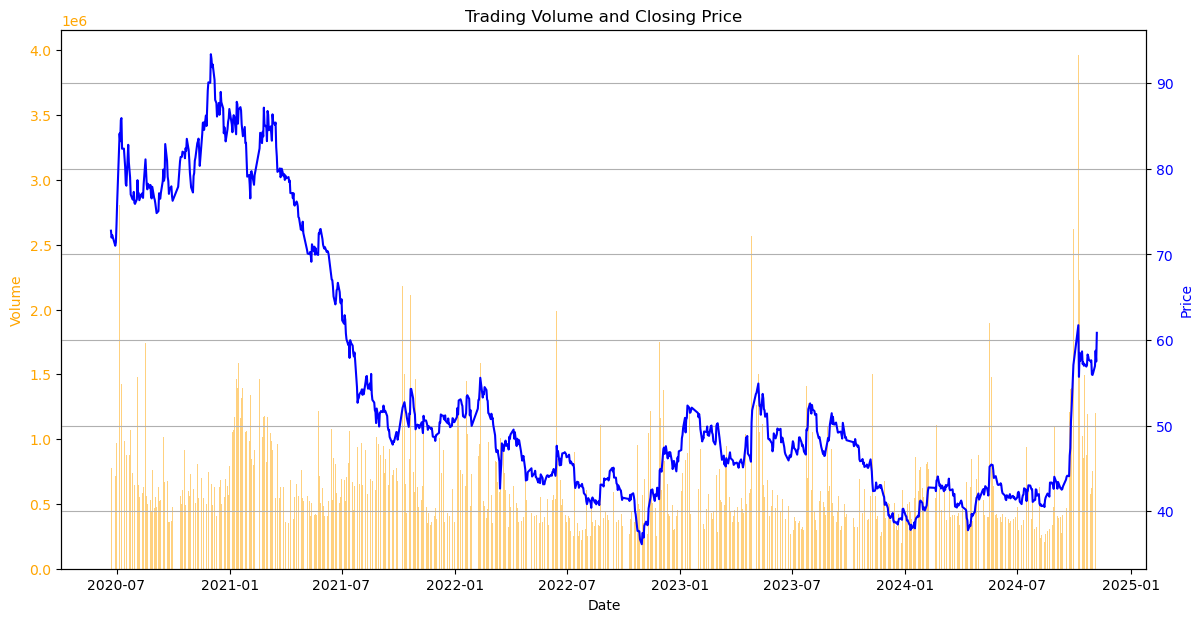

In [12]:
fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.bar(data1['trade_date'], data1['vol'], color='orange', alpha=0.5)
ax1.set_xlabel('Date')
ax1.set_ylabel('Volume', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')

ax2 = ax1.twinx()
ax2.plot(data1['trade_date'], data1['close'], label='Closing Price', color='blue')
ax2.set_ylabel('Price', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Trading Volume and Closing Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### ③ Comparison of Moving Average Trends

Use 5MA, 10MA, and 20MA moving averages plotted alongside the stock price to observe short-term and long-term price trends.
<br>--Short-term trend: When the closing price is above the 5-day MA, it indicates a strong short-term trend. Conversely, when the closing price is below the 5-day MA, it suggests a weak short-term trend.
<br>--Crossover Signals: The crossing of short-term MA over long-term MA (golden cross and death cross) provides buy and sell signals.
<br>--Consistency of Multiple MAs: The consistent direction of multiple MAs can confirm the stability of the trend.

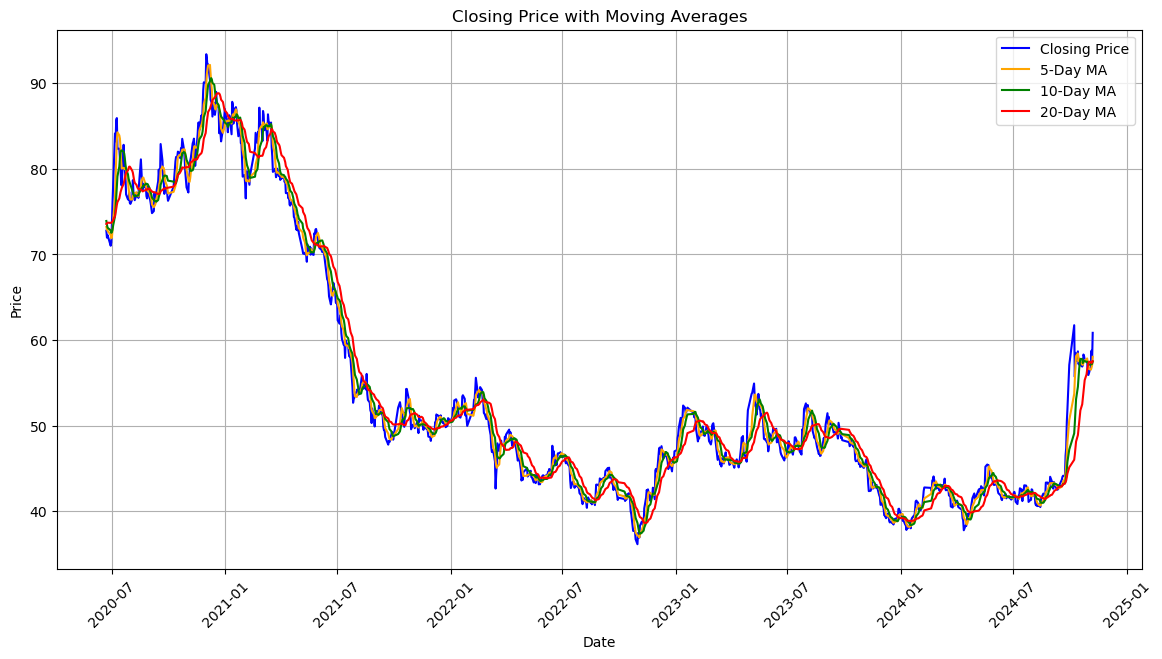

In [13]:
plt.figure(figsize=(14, 7))
plt.plot(data1['trade_date'], data1['close'], label='Closing Price', color='blue')
plt.plot(data1['trade_date'], data1['5MA'], label='5-Day MA', color='orange')
plt.plot(data1['trade_date'], data1['10MA'], label='10-Day MA', color='green')
plt.plot(data1['trade_date'], data1['20MA'], label='20-Day MA', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Closing Price with Moving Averages')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## 2.2 Visualization of Technical Analysis Indicators

### ① MACD Indicator

Displays the MACD line, signal line, and histogram to help identify buy and sell signals, analyze momentum changes, and detect trend reversals.

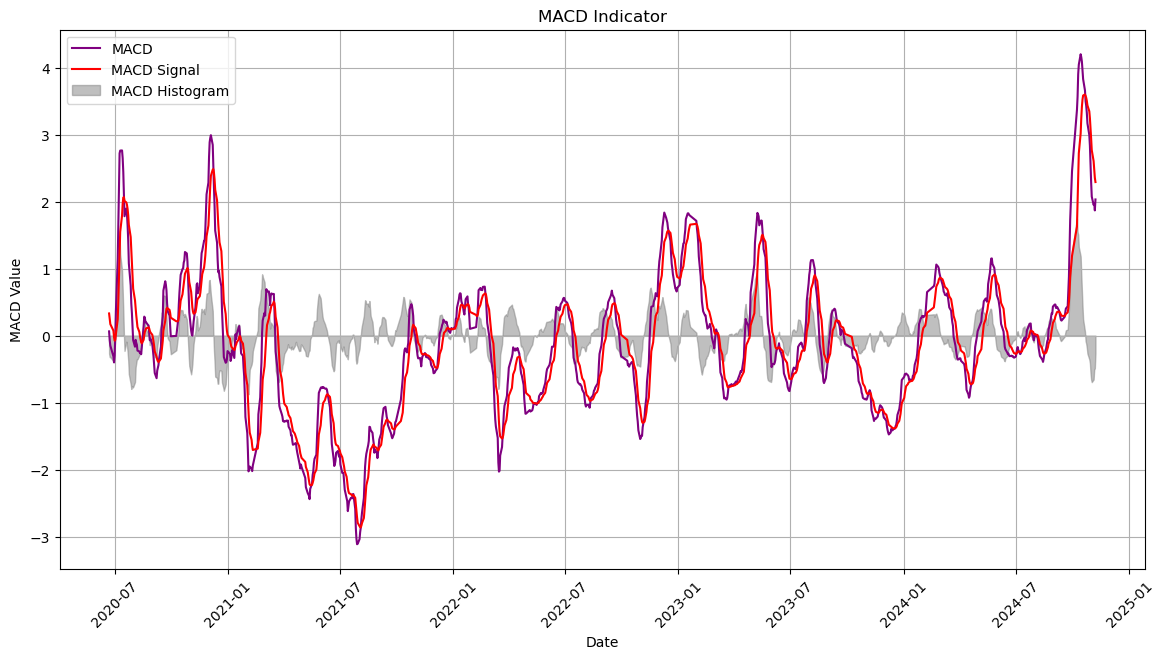

In [14]:
plt.figure(figsize=(14, 7))
plt.plot(data1['trade_date'], data1['MACD'], label='MACD', color='purple')
plt.plot(data1['trade_date'], data1['MACD_signal'], label='MACD Signal', color='red')
plt.fill_between(data1['trade_date'], data1['MACD_hist'], color='gray', alpha=0.5, label='MACD Histogram')
plt.xlabel('Date')
plt.ylabel('MACD Value')
plt.title('MACD Indicator')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### ② CCI (Commodity Channel Index)

Used to identify overbought or oversold conditions of the stock price, allowing observation of potential reversal points.

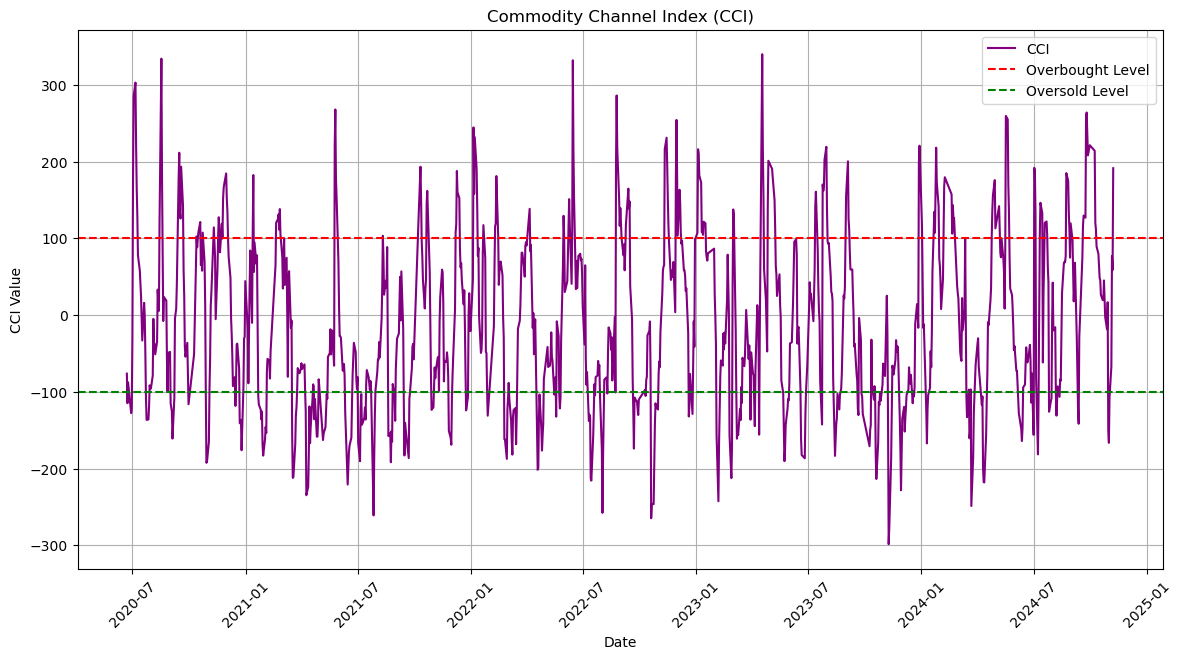

In [15]:
plt.figure(figsize=(14, 7))
plt.plot(data1['trade_date'], data1['CCI'], label='CCI', color='purple')
plt.axhline(y=100, color='red', linestyle='--', label='Overbought Level')
plt.axhline(y=-100, color='green', linestyle='--', label='Oversold Level')
plt.xlabel('Date')
plt.ylabel('CCI Value')
plt.title('Commodity Channel Index (CCI)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### ③ Rate of Change (ROC)

Analyzes the momentum strength and potential of the stock price’s rise or fall by comparing it to the stock price.

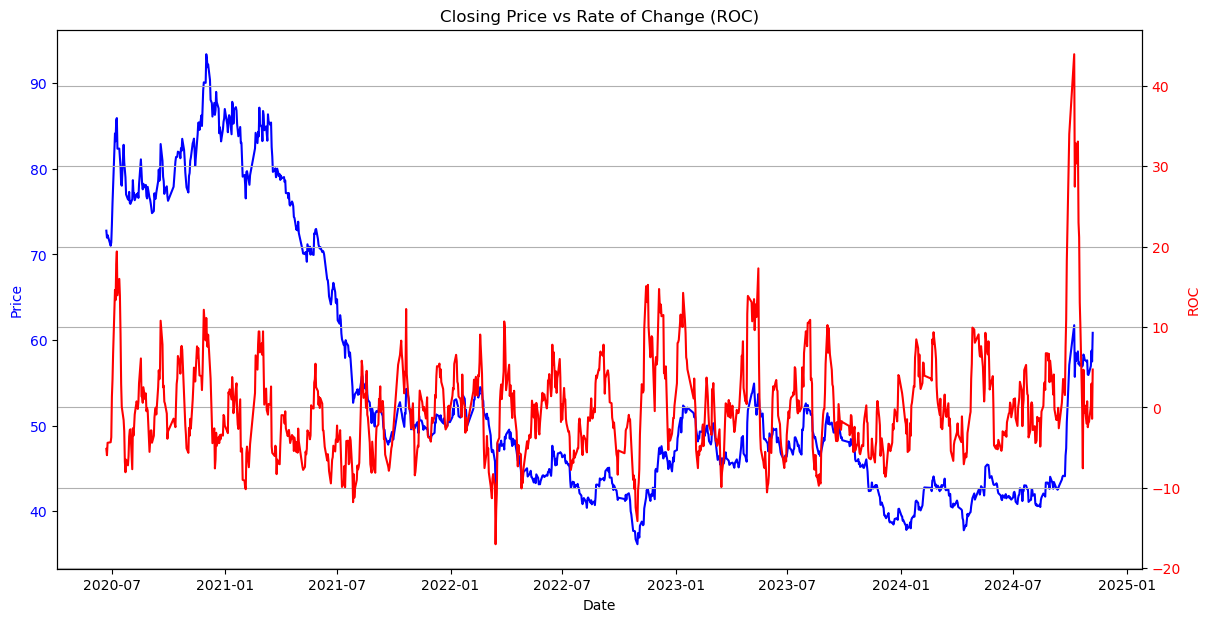

In [16]:
fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.plot(data1['trade_date'], data1['close'], label='Closing Price', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(data1['trade_date'], data1['ROC'], label='ROC', color='red')
ax2.set_ylabel('ROC', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Closing Price vs Rate of Change (ROC)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### ④ Bollinger Bands

Used to analyze the price volatility range, determine whether the price is in an extreme state, and help understand market volatility.

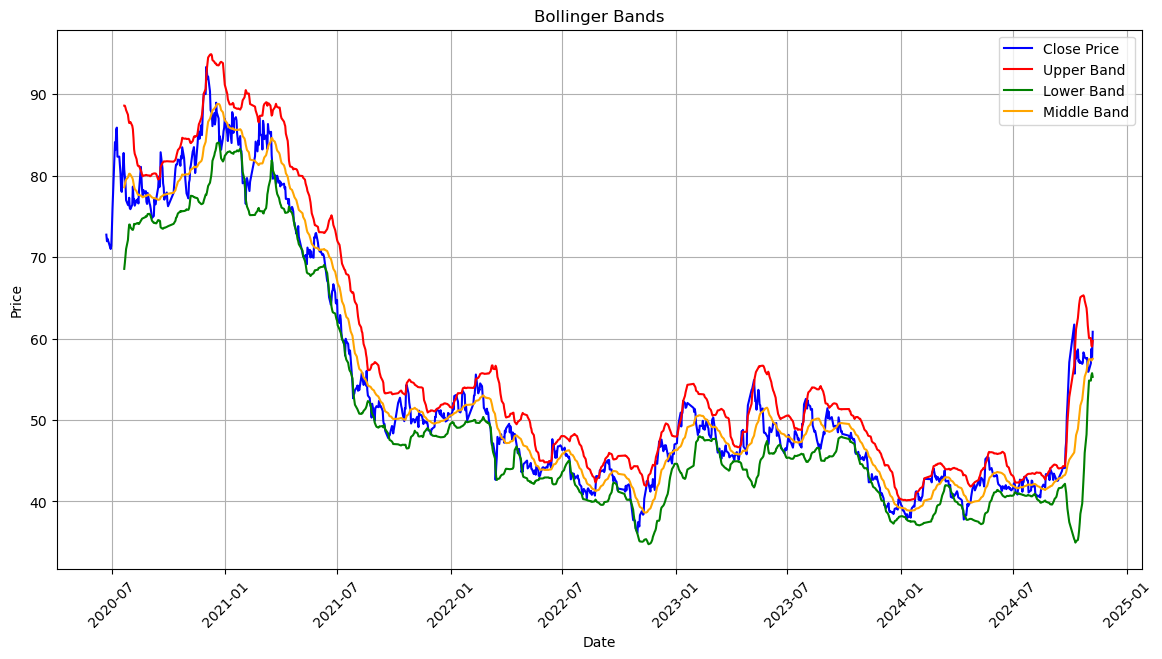

In [17]:
data1['Middle_Band'] = data1['close'].rolling(window=20).mean()
data1['Upper_Band'] = data1['Middle_Band'] + 2 * data1['close'].rolling(window=20).std()
data1['Lower_Band'] = data1['Middle_Band'] - 2 * data1['close'].rolling(window=20).std()

plt.figure(figsize=(14, 7))
plt.plot(data1['trade_date'], data1['close'], label='Close Price', color='blue')
plt.plot(data1['trade_date'], data1['Upper_Band'], label='Upper Band', color='red')
plt.plot(data1['trade_date'], data1['Lower_Band'], label='Lower Band', color='green')
plt.plot(data1['trade_date'], data1['Middle_Band'], label='Middle Band', color='orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bollinger Bands')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# 3. Data Preprocessing

In [18]:
data1 = data1.drop(columns=['Middle_Band', 'Upper_Band', 'Lower_Band'])

## 3.1 Descriptive Statistical Analysis

From the descriptive statistics of the data, the distribution of the data is normal in all aspects.

In [19]:
data1_without_date = data1.drop(columns=['trade_date'])
descriptive_stats = data1_without_date.describe()
print(descriptive_stats)

              open         high          low        close           vol  \
count  1062.000000  1062.000000  1062.000000  1062.000000  1.062000e+03   
mean     54.246299    54.870207    53.662288    54.231186  6.387217e+05   
std      14.844830    15.021910    14.595850    14.790684  3.568602e+05   
min      36.390000    36.670000    35.900000    36.150000  1.521990e+05   
25%      43.245000    43.702500    42.900000    43.242500  4.138465e+05   
50%      48.585000    49.105000    48.185000    48.610000  5.395579e+05   
75%      58.560000    59.807500    57.627500    58.530000  7.579411e+05   
max      93.380000    94.620000    92.090000    93.380000  3.961043e+06   

             amount   pct_change    amplitude  turnover_rate       pe_ttm  \
count  1.062000e+03  1062.000000  1062.000000    1062.000000  1062.000000   
mean   3.637056e+06     0.005481     2.187814       0.590705     9.045081   
std    2.656174e+06     1.559834     1.085312       0.330007     1.552567   
min    6.173250e

## 3.2 Training Set and Test Set Partition

Because this is a time series, we need to sort the data by trade_date in ascending order and reset the index before the training set and test set partition. The first 80% of the data used for training and the remaining 20% for testing.
<br>And y_train_log and y_test_log are obtained using np.log1p() to perform a log transformation, reducing the skewness in the data distribution.

In [20]:
data1['trade_date'] = pd.to_datetime(data1['trade_date'], format='%Y%m%d')

data1 = data1.sort_values(by='trade_date', ascending=True).reset_index(drop=True)

train_size = int(len(data1) * 0.8)

train_data = data1.iloc[:train_size]
test_data = data1.iloc[train_size:]

X_train = train_data.drop(columns=['close'])  
y_train = train_data['close']
X_test = test_data.drop(columns=['close'])
y_test = test_data['close']

y_train_log = np.log1p(y_train)  
y_test_log = np.log1p(y_test) 

print("Training set size:", len(X_train))
print("Test set size:", len(X_test))

Training set size: 849
Test set size: 213


In [21]:
X_train = X_train.drop(columns=['trade_date'])
X_test = X_test.drop(columns=['trade_date'])

## 3.3 Data Normalization

We use MinMaxScaler to create normalization objects that scale the data to a range between 0 and 1. Because the scales of the variables in the original data are different.

In [22]:
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

Applies normalization to the training set features.

In [23]:
X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train_log.values.reshape(-1, 1))

Uses the same normalization scale as the training set to transform the test set features , ensuring consistency and preventing data leakage.

In [24]:
X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test_log.values.reshape(-1, 1))

# 4. Supervised Learning Task

## 4.1 Random Forest

1.Using the RandomForestRegressor model to perform randomized grid search through RandomizedSearchCV to find the best parameter combination (n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features).

In [248]:
from sklearn.ensemble import RandomForestRegressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

In [249]:
rf_model = RandomForestRegressor(random_state=123)

In [250]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=10)

In [251]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model, 
    param_distributions=param_grid,
    n_iter=100,
    cv=tscv,
    random_state=42,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

2.Building a random forest model with the best parameters found and fitting it to the training dataset.

In [252]:
%%capture
random_search.fit(X_train_scaled, y_train_scaled.ravel())

In [253]:
print("Best Parameters:", random_search.best_params_)
print("Best Score:", -random_search.best_score_)

Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 20}
Best Score: 0.007014035941115155


3.Making predictions on the test dataset using the trained model, then applying inverse scaling to restore the original data scale.

In [254]:
best_params = random_search.best_params_
best_rf_model = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    random_state=42
)
best_rf_model.fit(X_train_scaled, y_train_scaled.ravel())

RandomForestRegressor(max_depth=20, max_features=None, n_estimators=200,
                      random_state=42)

In [255]:
y_pred_scaled = best_rf_model.predict(X_test_scaled)

y_pred_log = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

y_pred = np.expm1(y_pred_log)

y_test_original = np.expm1(y_test_log)

In [256]:
y_test_original = pd.Series(y_test_original.values).reset_index(drop=True)
y_pred = pd.Series(y_pred.ravel()).reset_index(drop=True)

4.Calculating the MSE and MAE on the test set and plotting the predicted versus actual values to facilitate comparison.

Mean Squared Error on Test Set: 0.3224
Mean Absolute Error on Test Set:0.2937


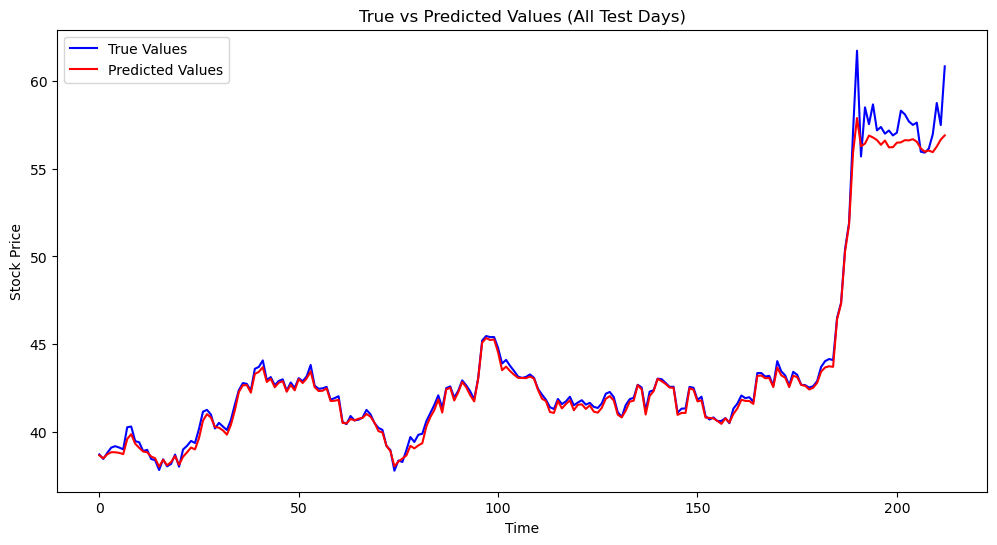

In [257]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test_original, y_pred)
print(f'Mean Squared Error on Test Set: {mse:.4f}')
mae = np.mean(np.abs(y_test_original - y_pred))
print(f"Mean Absolute Error on Test Set:{mae:.4f}")
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label='True Values', color='blue')
plt.plot(y_pred, label='Predicted Values', color='red')
plt.title('True vs Predicted Values (All Test Days)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

## 4.2 SVM

1.It defines a parameter grid , and then uses RandomizedSearchCV to perform hyperparameter tuning for the SVR model. Cross-validation (cv=tscv) is used to search for the best parameter combination for the data. The goal is to evaluate the model's performance using neg_mean_squared_error.
<br>The best parameters found are: kernel='linear', gamma=0.01, and C=100.

In [258]:
from sklearn.svm import SVR

In [259]:
param_grid = {
    'C': [0.1, 1, 10, 100,1000,10000],  
    'gamma': [1e-5, 1e-4, 1e-3, 1e-2, 0.1,1,10],  
    'kernel': ['rbf','linear','poly']
}

In [260]:
svr = SVR()
random_search = RandomizedSearchCV(
    svr, 
    param_distributions=param_grid, 
    cv=tscv, 
    n_iter=100,  
    scoring='neg_mean_squared_error', 
    n_jobs=-1, 
    random_state=42, 
    verbose=2
)

In [261]:
random_search.fit(X_train_scaled, y_train_scaled.ravel())

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=10, test_size=None),
                   estimator=SVR(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000, 10000],
                                        'gamma': [1e-05, 0.0001, 0.001, 0.01,
                                                  0.1, 1, 10],
                                        'kernel': ['rbf', 'linear', 'poly']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [262]:
print("Best Parameters:", random_search.best_params_)
print("Best MSE:", -random_search.best_score_)

Best Parameters: {'kernel': 'linear', 'gamma': 0.01, 'C': 100}
Best MSE: 0.01473977571219568


2.Using the best parameters to train the SVR model. Then the trained model is used in the test set.

In [263]:
best_params = random_search.best_params_
svr_model = SVR(kernel=best_params['kernel'], C=best_params['C'], gamma=best_params['gamma'])
svr_model.fit(X_train_scaled, y_train_scaled.ravel())

SVR(C=100, gamma=0.01, kernel='linear')

In [264]:
y_pred_scaled = svr_model.predict(X_test_scaled)

3.The data is inverse transformed to the original stock price scale.The test set is 6.2998.

Mean Squared Error on Test Set: 6.2998
Mean Absolute Error on Test Set:2.4237


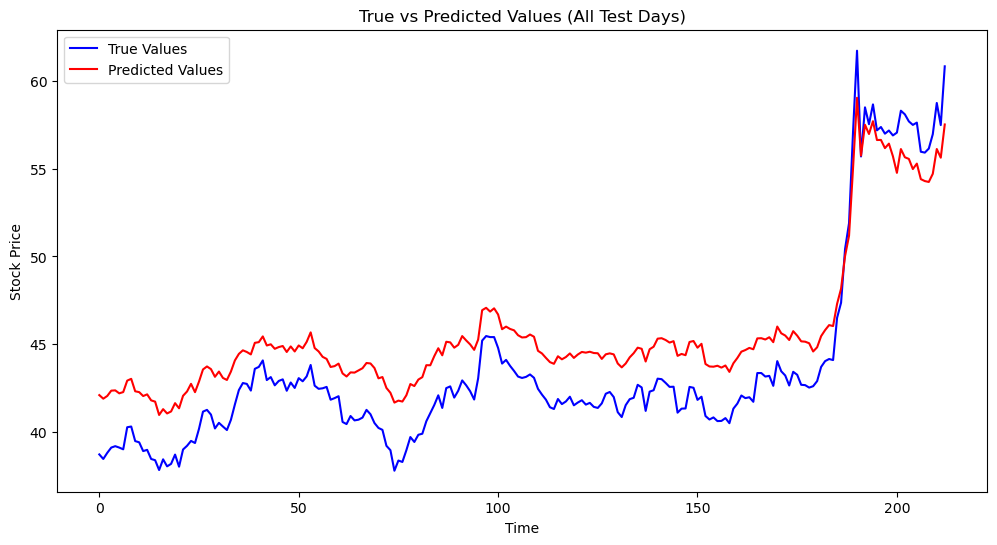

In [265]:
y_pred_log = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test_original = scaler_y.inverse_transform(y_test_scaled)

y_pred = np.expm1(y_pred_log)
y_test_original = np.expm1(y_test_original)

mse = mean_squared_error(y_test_original, y_pred)
print(f'Mean Squared Error on Test Set: {mse:.4f}')
mae = np.mean(np.abs(y_test_original - y_pred))
print(f"Mean Absolute Error on Test Set:{mae:.4f}")
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label='True Values', color='blue')
plt.plot(y_pred, label='Predicted Values', color='red')
plt.title('True vs Predicted Values (All Test Days)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


## 4.3 CNN-LSTM (long time to run)

1.X_train_scaled and X_test_scaled are reshaped to fit the input shape required by the 1D Convolutional Network (Conv1D). This is to ensure that the data format is suitable for the model's input requirements.

In [112]:
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

In [113]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import RandomizedSearchCV

2.A function named create_model() is defined to create the neural network model.Earlystopping is used to prevent the overfit.

In [114]:
from tensorflow.keras.callbacks import EarlyStopping

def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Flatten())
    model.add(Dense(1))

   
    if optimizer == 'adam':
        optimizer_instance = Adam()
    elif optimizer == 'rmsprop':
        optimizer_instance = RMSprop()
    else:
        raise ValueError(f"Unsupported optimizer: {optimizer}")

    model.compile(optimizer=optimizer_instance, loss='mse')

    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    model.fit_callbacks = [early_stopping]

    return model


In [115]:
from scikeras.wrappers import KerasRegressor

In [116]:
model = KerasRegressor(build_fn=create_model, verbose=0)

In [117]:
X_train_reshaped = X_train_reshaped.astype('float32')
y_train_scaled = y_train_scaled.astype('float32')

In [118]:
param_dist = {
    'batch_size': [16, 32, 64],
    'epochs': [50, 100],
    'optimizer': ['adam', 'rmsprop']  
}

In [119]:
import os
import tensorflow as tf

In [120]:
#ignore warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  
warnings.filterwarnings('ignore', category=UserWarning, module='tensorflow')
tf.get_logger().setLevel('ERROR') 

3.Set up random search and run it.Use the best hyperameters to create a model instance and train the model with the best parameters.

In [121]:
%%capture
random_search = RandomizedSearchCV(
    estimator=model, 
    param_distributions=param_dist,
    n_iter=100, 
    cv=tscv, 
    random_state=123,
    scoring='neg_mean_squared_error',
    n_jobs=1, 
    verbose=2
)


In [122]:
%%capture
from sklearn.utils import parallel_backend

with parallel_backend('threading'):
    random_result = random_search.fit(X_train_reshaped, y_train_scaled)

In [123]:
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))

Best: -0.001805 using {'optimizer': 'adam', 'epochs': 100, 'batch_size': 16}


In [124]:
best_params = random_result.best_params_
best_model = create_model(optimizer=best_params['optimizer'])

In [125]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [126]:
%%capture
history = best_model.fit(X_train_reshaped, y_train_scaled, epochs=best_params['epochs'], 
                         batch_size=best_params['batch_size'], 
                         callbacks=[early_stopping], verbose=1)


4.Do model prediction and calculate MSE and MAE

In [127]:
predictions_scaled = best_model.predict(X_test_reshaped)
y_pred_log = scaler_y.inverse_transform(predictions_scaled.reshape(-1, 1))
y_pred = np.expm1(y_pred_log)

7/7 [==============================] - 0s 5ms/step


In [128]:
y_pred_log = scaler_y.inverse_transform(predictions_scaled.reshape(-1, 1))
y_pred = np.expm1(y_pred_log).flatten()

y_test_actual = np.expm1(y_test_log).values  # Inverse the log transformation
mse = np.mean((y_test_actual - y_pred) ** 2)
print(f"Mean Squared Error on Test Set: {mse:.4f}")
mae = np.mean(np.abs(y_test_actual - y_pred))
print(f"Mean Absolute Error on Test Set:{mae:.4f}")

Mean Squared Error on Test Set: 0.4515
Mean Absolute Error on Test Set:0.4126


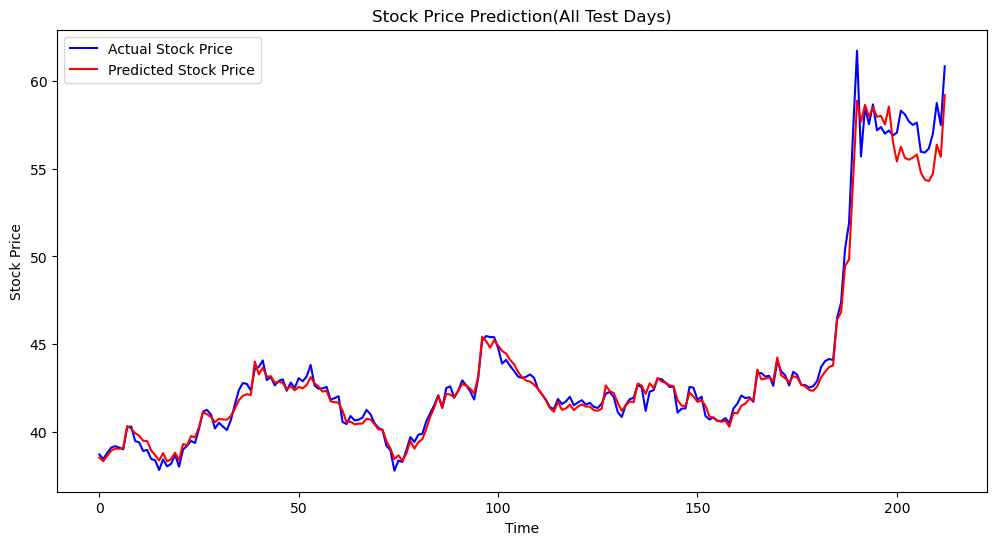

In [129]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Stock Price', color='blue')
plt.plot(y_pred, label='Predicted Stock Price', color='red')
plt.title('Stock Price Prediction(All Test Days)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

## 4.4 Model Comparison

1.MAE and MSE

In [266]:
data2 = {
    "Model": ["Random Forest", "SVM", "CNN-LSTM"],
    "MSE": [0.3224, 6.2998, 0.4515],
    "MAE": [0.2937, 2.4237, 0.4126]
}

df = pd.DataFrame(data2)


df.set_index("Model", inplace=True)


styled_df = df.style.set_table_styles([
    {'selector': 'thead th', 'props': [('border-bottom', '2px solid black')]},  # 表头的底部边框
    {'selector': 'thead th', 'props': [('text-align', 'center')]},  # 表头居中对齐
    {'selector': 'tbody td', 'props': [('border-bottom', '1px solid black'), ('text-align', 'center')]},  # 表格内容的底部边框和居中对齐
    {'selector': 'tbody tr:last-child td', 'props': [('border-bottom', '2px solid black')]}  # 最后一行的底部边框
]).format(precision=4)


styled_df

,MSE,MAE
Model,,
Random Forest,0.3224,0.2937
SVM,6.2998,2.4237
CNN-LSTM,0.4515,0.4126


From the chart, we can see that both MAE and MSE are the smallest in random forest model.

2.Computational resources and processing time

The training time for the Random Forest and SVM models is relatively short, while the training time for the CNN-LSTM model is significantly longer.

In conclusion, among the three models, the Random Forest model performed the best on this dataset.

# 5.Unsupervised Learning Task

## 5.1 PCA

Using Principal Component Analysis (PCA) to reduce the dimensionality of the data and then plotting a scree plot showing the explained variance ratio.

In [166]:
from sklearn.decomposition import PCA

retain enough principal components to explain 95% of the variance

In [167]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)

In order to prevent data leakage, retaining enough principal components to explain 95% of the variance.

In [168]:
X_test_pca = pca.transform(X_test_scaled)

In [176]:
explained_variance_ratios = []
components_range = range(1, X_train_scaled.shape[1] + 1)
for n_components in components_range:
    pca = PCA(n_components=n_components)
    pca.fit(X_train_scaled)
    explained_variance_ratios.append(sum(pca.explained_variance_ratio_))

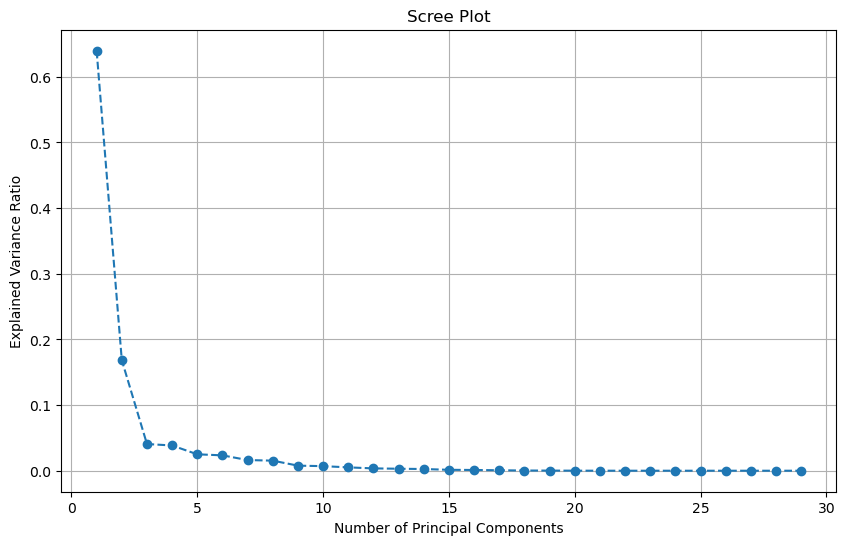

In [177]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

In [178]:
explained_variance_ratios = []
components_range = range(1, X_train_scaled.shape[1] + 1)
for n_components in components_range:
    pca = PCA(n_components=n_components)
    pca.fit(X_train_scaled)
    cumulative_variance = sum(pca.explained_variance_ratio_)
    explained_variance_ratios.append(cumulative_variance)
    
   
    if cumulative_variance >= 0.95:
        optimal_n_components = n_components
        break

In [221]:
print("PCA Training Set Size:", X_train_pca.shape)
print("PCA Test Set Size:", X_test_pca.shape)
print("Number of Principal Components Retained(95% variance explained):", pca.n_components_)

PCA Training Set Size: (849, 7)
PCA Test Set Size: (213, 7)
Number of Principal Components Retained(95% variance explained): 7


## 5.2 kernel PCA

In [216]:
from sklearn.decomposition import KernelPCA

In [217]:
max_components = X_train_scaled.shape[1]  
reconstruction_errors = []

Create a Kernel PCA object using the radial basis function (RBF) kernel with gamma parameter set to 0.1.

In [218]:
for n in range(1, max_components + 1):
    kpca = KernelPCA(n_components=n, kernel='rbf', gamma=0.1, fit_inverse_transform=True)
    data_kpca = kpca.fit_transform(X_train_scaled)
    data_reconstructed = kpca.inverse_transform(data_kpca)

    reconstruction_error = mean_squared_error(X_train_scaled, data_reconstructed)
    reconstruction_errors.append(reconstruction_error)

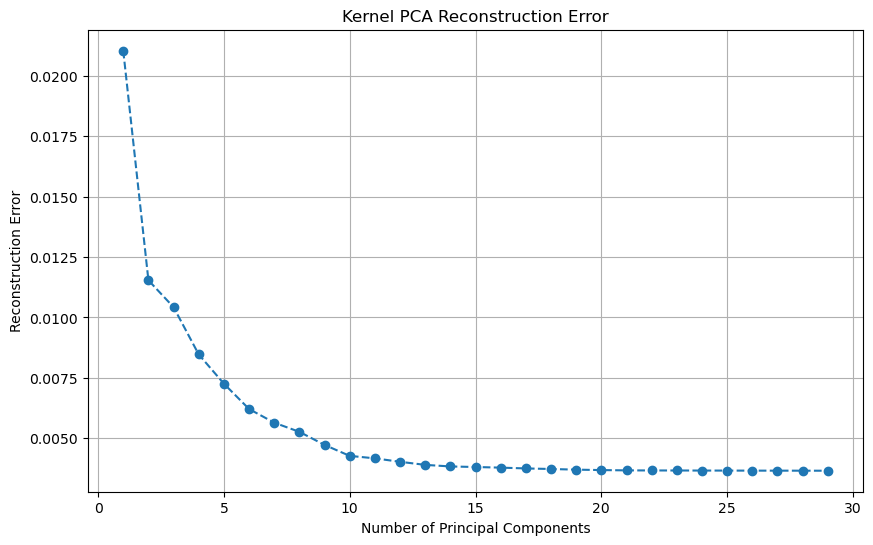

In [219]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_components + 1), reconstruction_errors, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Reconstruction Error')
plt.title('Kernel PCA Reconstruction Error')
plt.grid(True)
plt.show()

In [220]:
kernel_pca = KernelPCA(n_components=n_components_95, kernel='rbf', gamma=0.1, fit_inverse_transform=True)
X_train_kpca = kernel_pca.fit_transform(X_train_scaled)
X_test_kpca = kernel_pca.transform(X_test_scaled)

After 10 principal components, the reduction in reconstruction error slows down significantly and becomes stable. Therefore, 10 principal components might be a better choice.

## 5.3 Comparison of PCA and kernel PCA

### 5.3.1 Computational Efficiency

In [207]:
import time

start = time.time()

pca.fit(X_train_scaled)
end = time.time()
print("PCA time:", end - start)

start = time.time()

kpca.fit(X_train_scaled)
end = time.time()
print("Kernel PCA time:", end - start)

start = time.time()

PCA time: 0.00442051887512207
Kernel PCA time: 0.19671416282653809


PCA is more efficient than Kernel PCA.

### 5.3.2 Reconstruction Error

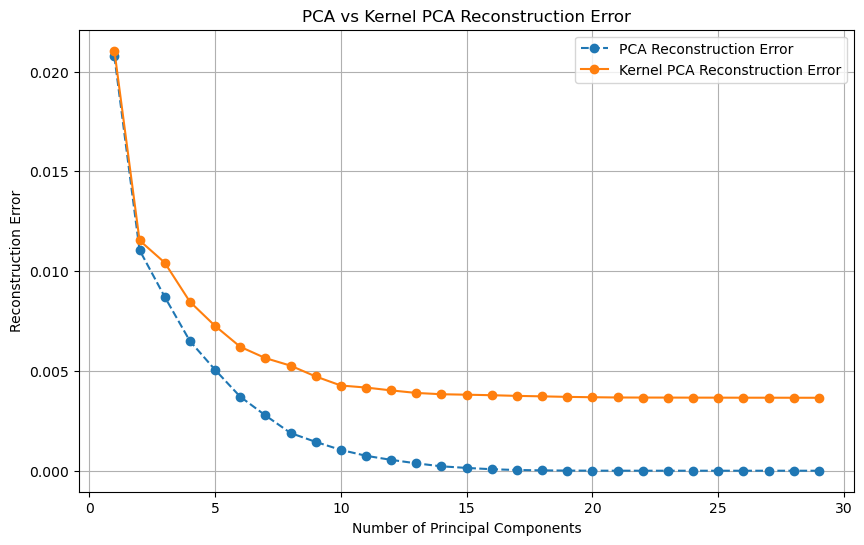

In [226]:
max_components = X_train_scaled.shape[1]

reconstruction_errors_pca = []
for n in range(1, max_components + 1):
    pca = PCA(n_components=n)
    data_pca = pca.fit_transform(X_train_scaled)
    data_reconstructed = pca.inverse_transform(data_pca)
    
    reconstruction_error = mean_squared_error(X_train_scaled, data_reconstructed)
    reconstruction_errors_pca.append(reconstruction_error)

reconstruction_errors_kpca = []
for n in range(1, max_components + 1):
    kpca = KernelPCA(n_components=n, kernel='rbf', gamma=0.1, fit_inverse_transform=True)
    data_kpca = kpca.fit_transform(X_train_scaled)
    data_reconstructed = kpca.inverse_transform(data_kpca)
    
   
    reconstruction_error = mean_squared_error(X_train_scaled, data_reconstructed)
    reconstruction_errors_kpca.append(reconstruction_error)

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_components + 1), reconstruction_errors_pca, marker='o', linestyle='--', label='PCA Reconstruction Error')
plt.plot(range(1, max_components + 1), reconstruction_errors_kpca, marker='o', linestyle='-', label='Kernel PCA Reconstruction Error')
plt.xlabel('Number of Principal Components')
plt.ylabel('Reconstruction Error')
plt.title('PCA vs Kernel PCA Reconstruction Error')
plt.legend()
plt.grid(True)
plt.show()


PCA seems to be more effective for this particular dataset in terms of minimizing reconstruction error with fewer components. Kernel PCA may provide some benefits depending on the type of non-linearity in the dataset, but in this instance, it consistently shows higher error.

Overall, PCA is better than Kernel PCA in this instance.

# 6. Supervised Learning Tasks based on PCA

In this section, we replace the original training and test data with PCA-transformed data, while keeping the steps of the supervised learning model consistent.

## 6.1 Random Forest based on PCA

In [274]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

In [275]:
rf_model = RandomForestRegressor(random_state=42)

In [276]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model, 
    param_distributions=param_grid,
    n_iter=100,
    cv=tscv,
    random_state=42,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

In [277]:
%%capture
random_search.fit(X_train_pca, y_train_scaled.ravel())

In [278]:
print("Best Parameters:", random_search.best_params_)
print("Best Score:", -random_search.best_score_)

Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 15}
Best Score: 0.007188840577158023


In [279]:
best_params = random_search.best_params_
best_rf_model = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    random_state=42
)
best_rf_model.fit(X_train_pca, y_train_scaled.ravel())

RandomForestRegressor(max_depth=15, max_features=None, n_estimators=300,
                      random_state=42)

In [280]:
#prevent data leakage
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [281]:
X_test_pca.shape

(213, 7)

In [282]:
y_pred_scaled = best_rf_model.predict(X_test_pca)
y_pred_log = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_pred = np.expm1(y_pred_log)
y_test_original = np.expm1(y_test_log)

In [283]:
y_test_original = pd.Series(y_test_original.values).reset_index(drop=True)
y_pred = pd.Series(y_pred.ravel()).reset_index(drop=True)

Mean Squared Error on Test Set: 3.6923
Mean Absolute Error on Test Set:1.6227


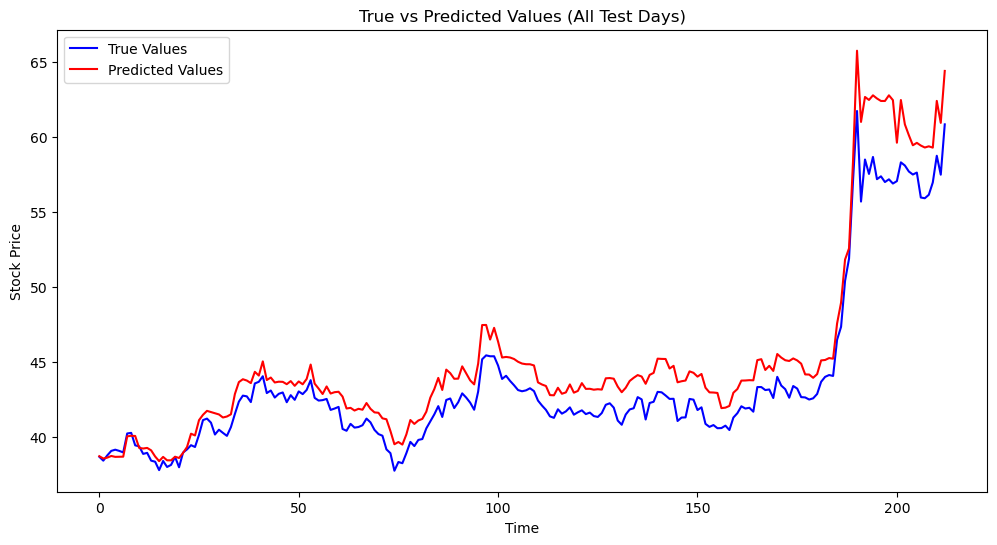

In [284]:
mse = mean_squared_error(y_test_original, y_pred)
print(f'Mean Squared Error on Test Set: {mse:.4f}')
mae = np.mean(np.abs(y_test_original - y_pred))
print(f"Mean Absolute Error on Test Set:{mae:.4f}")
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label='True Values', color='blue')
plt.plot(y_pred, label='Predicted Values', color='red')
plt.title('True vs Predicted Values (All Test Days)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

## 6.2 SVM based on PCA

In [285]:
param_grid = {
    'C': [0.1, 1, 10, 100,1000],  
    'gamma': [1e-5, 1e-4, 1e-3, 1e-2, 0.1],  
    'kernel': ['rbf']
}

In [286]:
svr = SVR()
random_search = RandomizedSearchCV(
    svr, 
    param_distributions=param_grid, 
    cv=tscv, 
    n_iter=30,  # 增加 n_iter 尝试更多的参数组合
    scoring='neg_mean_squared_error', 
    n_jobs=-1, 
    random_state=42, 
    verbose=2
)

In [287]:
random_search.fit(X_train_pca, y_train_scaled.ravel())

Fitting 10 folds for each of 25 candidates, totalling 250 fits


RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=10, test_size=None),
                   estimator=SVR(), n_iter=30, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1e-05, 0.0001, 0.001, 0.01,
                                                  0.1],
                                        'kernel': ['rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [288]:
print("Best Parameters:", random_search.best_params_)
print("Best MSE:", -random_search.best_score_)

Best Parameters: {'kernel': 'rbf', 'gamma': 0.0001, 'C': 1000}
Best MSE: 0.014346041758585804


In [289]:
best_params = random_search.best_params_
svr_model = SVR(kernel=best_params['kernel'], C=best_params['C'], gamma=best_params['gamma'])
svr_model.fit(X_train_pca, y_train_scaled.ravel())

SVR(C=1000, gamma=0.0001)

In [290]:
y_pred_scaled = svr_model.predict(X_test_pca)
y_pred_log = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test_original = scaler_y.inverse_transform(y_test_scaled)

y_pred = np.expm1(y_pred_log)
y_test_original = np.expm1(y_test_original)

mse = mean_squared_error(y_test_original, y_pred)
print(f'Mean Squared Error on Test Set: {mse:.4f}')
mae = np.mean(np.abs(y_test_original - y_pred))
print(f"Mean Absolute Error on Test Set:{mae:.4f}")

Mean Squared Error on Test Set: 5.5985
Mean Absolute Error on Test Set:2.2904


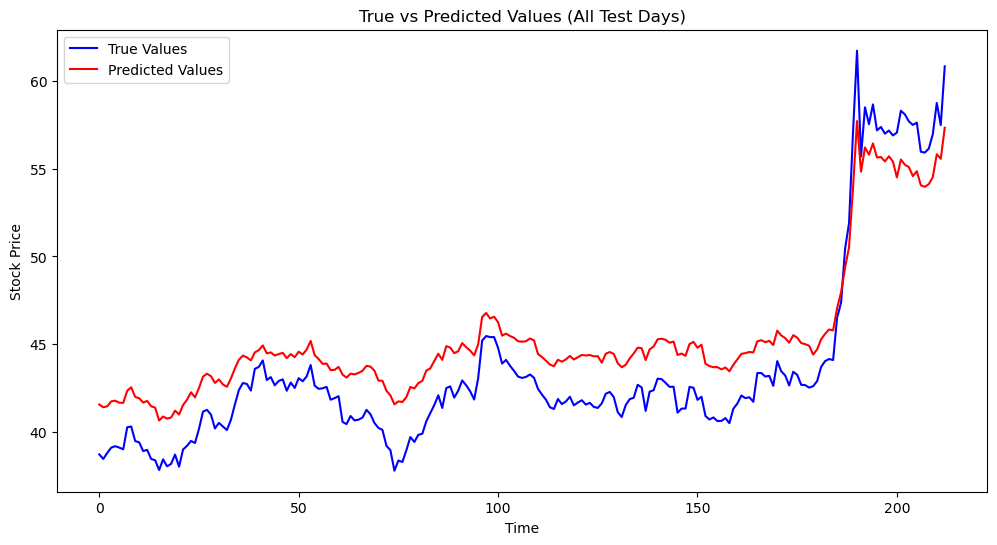

In [291]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label='True Values', color='blue')
plt.plot(y_pred, label='Predicted Values', color='red')
plt.title('True vs Predicted Values (All Test Days)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

## 6.3CNN-LSTM based on PCA 

In [292]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Reshape PCA output for LSTM input
X_train_pca_reshaped = X_train_pca.reshape((X_train_pca.shape[0], X_train_pca.shape[1], 1))
X_test_pca_reshaped = X_test_pca.reshape((X_test_pca.shape[0], X_test_pca.shape[1], 1))

In [303]:
from tensorflow.keras.callbacks import EarlyStopping

def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_pca_reshaped.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Flatten())
    model.add(Dense(1))

   
    if optimizer == 'adam':
        optimizer_instance = Adam()
    elif optimizer == 'rmsprop':
        optimizer_instance = RMSprop()
    else:
        raise ValueError(f"Unsupported optimizer: {optimizer}")

    model.compile(optimizer=optimizer_instance, loss='mse')

    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    model.fit_callbacks = [early_stopping]

    return model


In [304]:
from scikeras.wrappers import KerasRegressor

In [305]:
model = KerasRegressor(build_fn=create_model, verbose=0)

In [306]:
X_train_pca_reshaped = X_train_pca_reshaped.astype('float32')

In [307]:
param_dist = {
    'batch_size': [16, 32, 64],
    'epochs': [50, 100],
    'optimizer': ['adam', 'rmsprop']
}

In [308]:
%%capture
random_search = RandomizedSearchCV(
    estimator=model, 
    param_distributions=param_dist,
    n_iter=100, 
    cv=tscv, 
    random_state=123,
    scoring='neg_mean_squared_error',
    n_jobs=1, 
    verbose=2
)


In [309]:
%%capture
from sklearn.utils import parallel_backend

with parallel_backend('threading'):
    random_result = random_search.fit(X_train_pca_reshaped, y_train_scaled)

In [310]:
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))

Best: -0.003349 using {'optimizer': 'rmsprop', 'epochs': 50, 'batch_size': 16}


In [311]:
import os
import tensorflow as tf

# 设置环境变量以抑制日志输出
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # '0' 显示所有信息，'1' 隐藏 INFO，'2' 隐藏 WARNING，'3' 隐藏 ERROR
tf.get_logger().setLevel('ERROR')  # 同样设置 TensorFlow 的日志级别为 ERROR 以忽略 WARNING 信息


In [312]:
%%capture
# Train the best model
best_params = random_result.best_params_

# Create a new model using the best parameters
best_model = create_model(optimizer=best_params['optimizer'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the best model on full training set
history = best_model.fit(X_train_pca_reshaped, y_train_scaled, epochs=best_params['epochs'], 
                         batch_size=best_params['batch_size'], 
                         validation_data=(X_test_pca_reshaped, y_test_scaled), 
                         callbacks=[early_stopping], verbose=1)


In [313]:
%%capture
predictions_scaled = best_model.predict(X_test_pca_reshaped)

y_pred_log = scaler_y.inverse_transform(predictions_scaled.reshape(-1, 1))
y_pred = np.expm1(y_pred_log).flatten()


Mean Squared Error on Test Set: 2.7863
Mean Absolute Error (MAE):1.3225


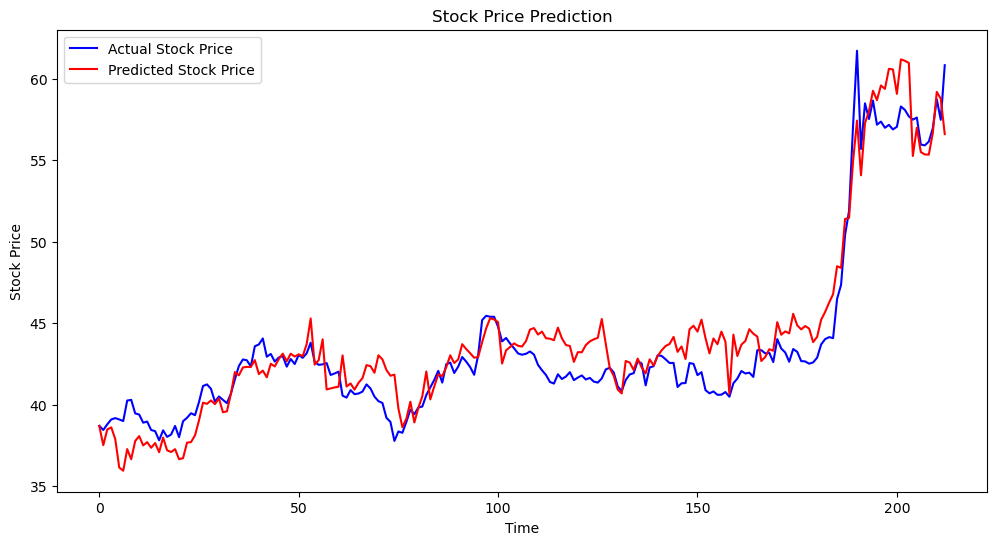

In [315]:
y_test_actual = np.expm1(y_test_log).values  # Inverse the log transformation and ensure it's a NumPy array
mse = np.mean((y_test_actual - y_pred) ** 2)
print(f"Mean Squared Error on Test Set: {mse:.4f}")
mae = np.mean(np.abs(y_test_actual - y_pred))
print(f"Mean Absolute Error (MAE):{mae:.4f}")


plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Stock Price', color='blue')
plt.plot(y_pred, label='Predicted Stock Price', color='red')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


## 6.4 Comparison of three model based on PCA

In [318]:
data3= {
    "Model": ["Random Forest", "SVM", "CNN-LSTM"],
    "MSE": [3.6923, 5.5985, 2.7863],
    "MAE": [1.6227, 2.2904, 1.3225]
}


df = pd.DataFrame(data3)
df.set_index("Model", inplace=True)  # 将模型名称设置为索引

# 设置样式为三线表
styled_df = df.style.set_table_styles([
    {'selector': 'thead th', 'props': [('border-bottom', '2px solid black')]},
    {'selector': 'tr:nth-of-type(1) td', 'props': [('border-top', '2px solid black')]},
    {'selector': 'tr:last-child td', 'props': [('border-bottom', '2px solid black')]}
]).format(precision=4)  # 设置精度为四位小数

# 展示数据
styled_df

,MSE,MAE
Model,,
Random Forest,3.6923,1.6227
SVM,5.5985,2.2904
CNN-LSTM,2.7863,1.3225


Support Vector Machine (SVM) is quite sensitive to high-dimensional data, especially when the data contains many redundant features. High-dimensional data can make SVM unstable, leading to overfitting or poor generalization. PCA helps to improve the generalization performance of SVM by extracting the most important components from the data, thus removing redundant features, which may result in a decrease in the error of the SVM.

CNN-LSTM and Random Forest are more complex models with higher representational capabilities. If the data is overly simplified, these models may not be able to learn sufficient information. This causes these complex models to perform worse on the reduced data compared to the original data.

# 7.Summary

This study focuses on the effectiveness of three machine learning models for financial time series forecasting. After data preprocessing, cross-validation (CV) was used to determine the optimal parameters for each model, which were then fitted based on the training set, and tested on the test set to evaluate performance. After comparing PCA and Kernel PCA, PCA was selected. The study further investigated the fitting performance of three PCA-based models. The results showed that, in this case, the Random Forest model using the original data yielded the best performance.